In [1]:
# Source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
X = np.array([
             [2,2],
             [3,3],
             [3,4],
             [4.5,5],
             [6,6],
             [6,8],
             [7,9],
             [8,8],
             [9,10]
             ])

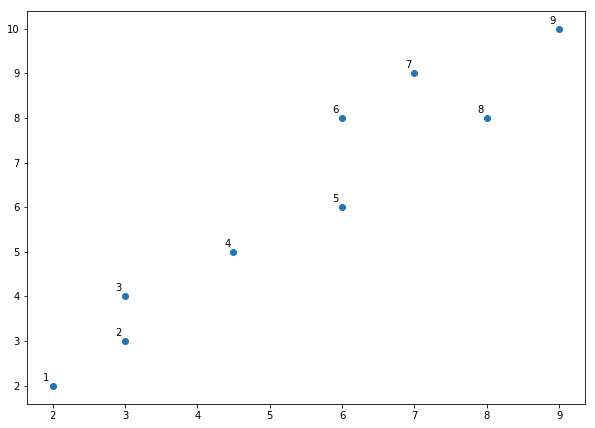

In [4]:
labels = range(1,len(X)+1)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label,x,y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-3,3),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

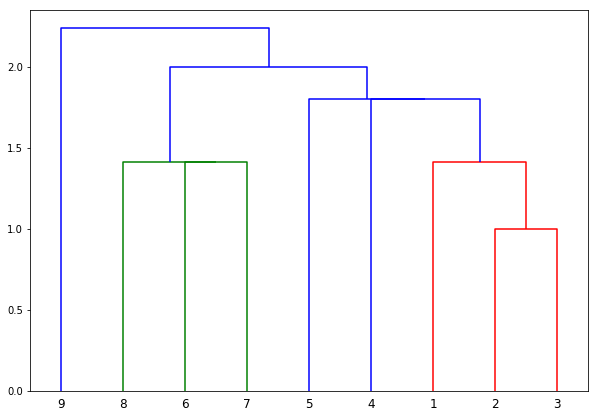

In [5]:
linked = linkage(X, 'single')
plt.figure(figsize=(10,7))

dendrogram(linked,
          orientation='top',
          labels=labels,
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

In [6]:
# format [idx1, idx2, dist, sample_count]
#print(linked)

In [7]:
for i in range(len(linked)):
    linked[i][0] = linked[i][0] + 1
    linked[i][1] = linked[i][1] + 1
print(linked)

[[ 2.          3.          1.          2.        ]
 [ 1.         10.          1.41421356  3.        ]
 [ 6.          7.          1.41421356  2.        ]
 [ 8.         12.          1.41421356  3.        ]
 [ 4.         11.          1.80277564  4.        ]
 [ 5.         14.          1.80277564  5.        ]
 [13.         15.          2.          8.        ]
 [ 9.         16.          2.23606798  9.        ]]


In [8]:
linked[1][0:2]

array([ 1., 10.])

In [9]:
print(len(X))
print(len(linked))
print(linked[1])
print(linked[1][0])

9
8
[ 1.         10.          1.41421356  3.        ]
1.0


In [21]:
cluster_steps = []
for i in range(len(linked)):
    current_cluster = []
    x = int(linked[i][0])
    y = int(linked[i][1])

    if x>len(X):
        current_cluster.append(x-len(X))
    else:
        current_cluster.append(x)
    if y>len(X):
        current_cluster.append(y-len(X))
    else:
        current_cluster.append(y)
    cluster_steps.append(current_cluster)

for cluster in cluster_steps:
    print(cluster)

[2, 3]
[1, 1]
[6, 7]
[8, 3]
[4, 2]
[5, 5]
[4, 6]
[9, 7]


In [11]:
X[8]

array([ 9., 10.])